In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import qgrid
import seaborn as sns

In [2]:
files = {"all": "../../explanations-for-ner-train-finnish-20190114-total.txt",
        "only_target_entities": "../../explanations-for-ner-train-finnish-20190115-total-only_target_entities.txt",
        "finnish_model_100_size": "explanations-for-ner-train-finnish_model_100_size.txt",
        "turkish_model_100_size": "explanations-for-ner-train-turkish_model_100_size.txt"}

In [3]:
lines = []
records = []
with open(files["turkish_model_100_size"], "r") as f:
    lines = f.readlines()
    for line in lines:
        tokens = line.strip().split("\t")
        record = [int(tokens[0]), tokens[1], tuple([int(x) for x in tokens[2].split(" ")])]
        record.append({k: float(v) for k, v in [tuple(x.split(" ")) for x in tokens[3:]]})
        records.append(record)

In [4]:
records[0]

[0,
 'ORG',
 (4, 8),
 {'Adj': 4.521323117727035e-06,
  'Conj': -2.1017373372907055e-06,
  'Prop': -1.8216286510101124e-06,
  'Pnon': 7.98815719450397e-07,
  'Adverb': 5.327476508498134e-07,
  'Nom': 4.4767481738537954e-07,
  'A3sg': -1.9702445355269973e-07,
  'Noun': -1.6567943824763496e-07,
  'Acc': -6.29512826292373e-08,
  'P2sg': -6.295128262923728e-08,
  'Dat': -6.295128262923728e-08,
  'Nom^DB': -6.295128262923727e-08,
  'Loc': -6.295128262923725e-08,
  'Verb^DB': -6.295128262923725e-08,
  'Adj^DB': -6.295128262923725e-08,
  'Inf2': -6.295128262923725e-08,
  'Imp': -6.295128262923725e-08,
  'Num': -6.295128262923724e-08,
  'Pass': -6.295128262923724e-08,
  'FutPart': -6.295128262923724e-08,
  'FitFor': -6.295128262923724e-08,
  'Pos': -6.295128262923723e-08,
  'Ness': -6.295128262923723e-08,
  'Verb': -6.295128262923721e-08,
  'Card': -6.295128262923721e-08,
  'Prog1': -6.295128262923721e-08,
  'Ins': -6.295128262923721e-08,
  'Fut': -6.295128262923721e-08,
  'Acquire': -6.2951282

In [5]:
list(record[3].values())

[0.005611950128164902,
 0.00020523058649982685,
 -0.00019720794681488344,
 -0.00017132008794668583,
 -0.00017132008794668583,
 -0.0001713200879466858,
 -0.0001713200879466858,
 -0.0001713200879466858,
 -0.00017132008794668577,
 -0.00017132008794668577,
 -0.00017132008794668577,
 -0.00017132008794668577,
 -0.00017132008794668577,
 -0.00017132008794668577,
 -0.00017132008794668577,
 -0.00017132008794668575,
 -0.00017132008794668575,
 -0.00017132008794668575,
 -0.00017132008794668575,
 -0.00017132008794668575,
 -0.00017132008794668572,
 -0.00017132008794668572,
 -0.00017132008794668572,
 -0.00017132008794668572,
 -0.00017132008794668572,
 -0.00017132008794668572,
 -0.00017132008794668572,
 -0.00017132008794668572,
 -0.00017132008794668572,
 -0.0001713200879466857,
 -0.0001713200879466857,
 -0.0001713200879466857,
 -0.00017132008794668567,
 -0.0001011934829113146,
 -3.639935973717184e-05]

In [6]:
def log_sum_exp(input_x):
    max_value = np.max(input_x)
    return np.log(np.sum([np.exp(x-max_value) for x in input_x])) + max_value

log_sum_exp([1, 2])

2.313261687518223

In [7]:
np.logaddexp(*[1, 2])

2.313261687518223

In [8]:
group_by_entity_type = {}
for record in records:
    entity_type = record[1]
    if entity_type not in group_by_entity_type:
        group_by_entity_type[entity_type] = {}
    if entity_type in group_by_entity_type:
        # sum_weights = log_sum_exp(list(record[3].values()))
#         min_value = np.min(list(record[3].values()))
#         max_value = np.max(list(record[3].values()))
        for morpho_tag, weight in record[3].items():
#             value = np.exp(weight - sum_weights)
#             value = (weight-min_value)/float(max_value-min_value)
            value = weight
            if morpho_tag in group_by_entity_type[entity_type]:
                group_by_entity_type[entity_type][morpho_tag].append(value)
            else:
                group_by_entity_type[entity_type][morpho_tag] = [value]

In [9]:
group_by_entity_type.keys()

dict_keys(['ORG', 'LOC', 'PER'])

In [10]:
group_by_entity_type['ORG'].keys()

dict_keys(['Adj', 'Conj', 'Prop', 'Pnon', 'Adverb', 'Nom', 'A3sg', 'Noun', 'Acc', 'P2sg', 'Dat', 'Nom^DB', 'Loc', 'Verb^DB', 'Adj^DB', 'Inf2', 'Imp', 'Num', 'Pass', 'FutPart', 'FitFor', 'Pos', 'Ness', 'Verb', 'Card', 'Prog1', 'Ins', 'Fut', 'Acquire', 'P3sg', 'Pos^DB', 'Punc', 'Neg', 'A2pl', 'Reflex', 'A3pl', 'PresPart', 'Opt', 'Zero', 'P3pl', 'Caus', 'Pres', 'Postp', 'Aor^DB', 'Zero^DB', 'A1sg', 'Recip^DB', 'PCNom', 'P1sg', 'Ord', 'Gen', '*UNKNOWN*', 'Loc^DB', 'Rel', 'Narr^DB', 'Narr', 'With', 'Almost', 'A2sg', 'Noun^DB', 'Ly', 'AsIf', 'Equ', 'Pron', 'PastPart', 'Demons', 'A1pl', 'Cop', 'Pers', 'While', 'P1pl', 'Since', 'PresPart^DB', 'Past', 'Abl', 'Cond', 'Inf3', 'Recip', 'Prog2', 'Inf1', 'Det', 'PCAbl^DB', 'Agt', 'FeelLike', 'WithoutHavingDoneSo', 'Ques', 'Card^DB', 'PCDat', 'With^DB', 'Neg^DB', 'PCAbl', 'Inf2^DB', 'Pass^DB', 'Aor', 'Able', 'Related', 'Caus^DB', 'Neces', 'ByDoingSo', 'Interj', 'Become^DB', 'PCIns', 'JustLike', 'PCDat^DB', 'Become', 'AsLongAs', 'Acquire^DB', 'AfterDo

In [11]:
stats_by_entity_type = {key: dict() for key in group_by_entity_type.keys()}
for entity_type in stats_by_entity_type.keys():
    for morpho_tag in group_by_entity_type[entity_type]:
        l = group_by_entity_type[entity_type][morpho_tag]
        stats_by_entity_type[entity_type][morpho_tag] = (np.mean(l), len(l))

In [12]:
for entity_type in stats_by_entity_type.keys():
    sorted_l = sorted(stats_by_entity_type[entity_type].items(), key=lambda x: np.abs(x[1][0]), reverse=True)
    print(entity_type, sorted_l[:10])

ORG [('Prop', (0.003953122176717941, 5997)), ('Ratio', (0.002246649761148021, 1)), ('InBetween', (0.0019074439390759721, 83)), ('Pnon', (-0.0013387297015180918, 6267)), ('Nom', (-0.0010182114467190758, 6254)), ('Abl^DB', (-0.0009923624659089725, 8)), ('Desr', (0.000882998298644251, 114)), ('Dist', (-0.00086667237789481, 17)), ('Adamantly', (0.0006994228040625286, 1)), ('FitFor^DB', (0.000692109592702313, 5))]
LOC [('Prop', (0.041413095226706935, 6720)), ('Inf', (-0.00761294176243456, 5)), ('EverSince^DB', (-0.004417828035702524, 1)), ('WithoutBeingAbleToHaveDoneSo', (-0.0037995627223160076, 2)), ('Prog2^DB', (-0.0037868559153898924, 5)), ('Stay^DB', (-0.0035578472609200315, 1)), ('Related^DB', (-0.0033636098288089204, 12)), ('Dup', (-0.0030018733871093246, 12)), ('PCIns^DB', (-0.002913047423265495, 17)), ('Desr', (-0.0025075101806977438, 146))]
PER [('Prop', (0.00808878905560223, 9134)), ('Pnon', (-0.002696392480871081, 9317)), ('Noun', (0.001186684668444686, 9317)), ('WithoutBeingAble

In [13]:
all_morpho_tags = set()
for record in records:
    all_morpho_tags.update(set(record[3].keys()))
all_morpho_tags
morpho_tag_to_id = {m: idx for idx, m in enumerate(all_morpho_tags)}
morpho_tag_to_id

{'PresPart^DB': 0,
 'Acc': 1,
 'Real': 2,
 'Pos': 3,
 'P2pl': 4,
 'Stay^DB': 5,
 'Dim': 6,
 'Imp': 7,
 'PCGen': 8,
 'Pos^DB': 9,
 'PCAbl^DB': 10,
 'Aor': 11,
 'Inf2': 12,
 'Neg^DB': 13,
 'PCIns^DB': 14,
 'Pnon': 15,
 'Prog2': 16,
 'Dup^DB': 17,
 'P3pl': 18,
 'AsIf^DB': 19,
 'Zero^DB': 20,
 'Neg': 21,
 'Zero': 22,
 'Ord^DB': 23,
 'Det': 24,
 'Distrib': 25,
 'Recip^DB': 26,
 'Gen': 27,
 '*UNKNOWN*': 28,
 'FutPart': 29,
 'A2pl': 30,
 'Caus': 31,
 'Card': 32,
 'Dat^DB': 33,
 'Become^DB': 34,
 'ByDoingSo': 35,
 'Related': 36,
 'Ord': 37,
 'EverSince': 38,
 'Cond': 39,
 'Adj': 40,
 'Since': 41,
 'While': 42,
 'Dist': 43,
 'Almost': 44,
 'Opt': 45,
 'P1pl': 46,
 'Rel^DB': 47,
 'WithoutHavingDoneSo': 48,
 'Adj^DB': 49,
 'JustLike': 50,
 'AsLongAs': 51,
 'Verb': 52,
 'Punc': 53,
 'Inf2^DB': 54,
 'Neces': 55,
 'Quant': 56,
 'DemonsP': 57,
 'PCNom^DB': 58,
 'Aor^DB': 59,
 'Inf1': 60,
 'Acquire^DB': 61,
 'A2sg': 62,
 'Dup': 63,
 'Agt^DB': 64,
 'Verb^DB': 65,
 'Fut': 66,
 'Noun^DB': 67,
 'FitFor^DB

In [14]:
record

[25512,
 'LOC',
 (16, 17),
 {'Prop': 0.005611950128164902,
  'Pnon': 0.00020523058649982685,
  'Noun': -0.00019720794681488344,
  'Zero': -0.00017132008794668583,
  'P2sg': -0.00017132008794668583,
  'Adj': -0.0001713200879466858,
  'Conj': -0.0001713200879466858,
  'Adj^DB': -0.0001713200879466858,
  'Pos': -0.00017132008794668577,
  'Loc': -0.00017132008794668577,
  'Adverb': -0.00017132008794668577,
  'Num': -0.00017132008794668577,
  'Inf2': -0.00017132008794668577,
  'Postp': -0.00017132008794668577,
  'Ness': -0.00017132008794668577,
  'P3sg': -0.00017132008794668575,
  'A3pl': -0.00017132008794668575,
  'PCNom': -0.00017132008794668575,
  'Ord': -0.00017132008794668575,
  'PCIns': -0.00017132008794668575,
  'Pos^DB': -0.00017132008794668572,
  'Nom^DB': -0.00017132008794668572,
  'Imp': -0.00017132008794668572,
  'Ins': -0.00017132008794668572,
  'Agt': -0.00017132008794668572,
  'Aor': -0.00017132008794668572,
  'P1sg': -0.00017132008794668572,
  'Card^DB': -0.00017132008794668

In [15]:
records_for_panda = []
for record in records:
    record_pre_panda = [record[0], record[1], record[2][0], record[2][1]]
    morpho_tags = [None] * len(morpho_tag_to_id)
    for morpho_tag, idx in morpho_tag_to_id.items():
        if morpho_tag in record[3]:
            morpho_tags[idx] = record[3][morpho_tag]
    record_pre_panda += morpho_tags
    records_for_panda.append(record_pre_panda)
#     print(record_pre_panda)

In [16]:
id_to_morpho_tag = {idx: morpho_tag for morpho_tag, idx in morpho_tag_to_id.items()}
column_names = ['sentence_idx', 'entity_type', 'entity_start', 'entity_end']
column_names += [id_to_morpho_tag[x] for x in range(len(morpho_tag_to_id))]
explanations = pd.DataFrame(records_for_panda, columns=column_names)

In [17]:
explanations

,sentence_idx,entity_type,entity_start,entity_end,PresPart^DB,Acc,Real,Pos,P2pl,Stay^DB,...,Stay,NotState,Real^DB,Loc^DB,Pers,Ratio,Ins,Recip,Prop,PersP
0,0,ORG,4,8,NaN,-6.295128e-08,NaN,-6.295128e-08,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-6.295128e-08,NaN,-1.821629e-06,NaN
1,0,LOC,11,12,NaN,-3.430780e-04,NaN,-3.430780e-04,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-3.430780e-04,NaN,1.197606e-02,NaN
2,3,LOC,43,48,NaN,9.973313e-05,NaN,9.973313e-05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.681195e-05,NaN
3,5,LOC,0,1,NaN,-1.808816e-02,NaN,-1.808816e-02,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.119686e-01,NaN
4,10,ORG,0,1,NaN,2.492694e-04,NaN,2.492694e-04,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.351769e-03,NaN
5,10,LOC,12,13,NaN,-4.805490e-05,NaN,-4.805490e-05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.385995e-03,NaN
6,10,LOC,14,15,NaN,-5.048961e-05,NaN,-5.048961e-05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.713281e-03,NaN
7,10,LOC,16,17,NaN,-1.367715e-03,NaN,-1.367715e-03,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.221558e-02,NaN
8,11,LOC,4,5,NaN,-1.579117e-04,NaN,-1.579117e-04,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.215707e-03,NaN
9,11,LOC,6,7,NaN,-8.369048e-04,NaN,-8.369048e-04,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.542137e-02,NaN


In [18]:
df_by_entity_type = explanations.groupby('entity_type')

In [19]:
df_by_entity_type['Loc'].mean()

entity_type
LOC    0.000436
ORG   -0.000021
PER   -0.000210
Name: Loc, dtype: float64

In [20]:
explanations.drop(['sentence_idx', 'entity_start', 'entity_end'], axis=1).groupby('entity_type').mean()

,PresPart^DB,Acc,Real,Pos,P2pl,Stay^DB,Dim,Imp,PCGen,Pos^DB,...,Stay,NotState,Real^DB,Loc^DB,Pers,Ratio,Ins,Recip,Prop,PersP
entity_type,,,,,,,,,,,,,,,,,,,,,
LOC,-0.001337,-0.001560,-0.001614,-1.574182e-03,-0.001281,-0.003558,-0.001568,-0.001422,-0.001630,-1.418916e-03,...,NaN,-0.000412,-0.002012,-0.000975,-0.001225,-0.000058,-0.001397,-0.001172,0.041413,-0.000954
ORG,-0.000009,-0.000353,-0.000022,7.382117e-07,-0.000284,NaN,-0.000118,-0.000034,0.000368,8.693754e-07,...,NaN,-0.000225,0.000013,-0.000103,-0.000011,0.002247,-0.000004,0.000059,0.003953,-0.000059
PER,-0.000078,-0.000359,0.000756,-2.368272e-04,-0.000133,NaN,-0.000476,-0.000178,0.000033,-2.190924e-04,...,-0.00043,0.000062,0.000358,-0.000237,-0.000185,-0.001116,-0.000350,-0.000158,0.008089,-0.000043


In [21]:
means_over_entity_type = explanations.drop(['sentence_idx', 'entity_start', 'entity_end'], axis=1).groupby('entity_type').mean()

In [22]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1187a9898>]],
      dtype=object)

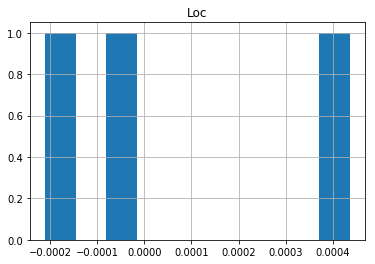

In [23]:
means_over_entity_type.hist(['Loc'])

In [24]:
means_over_entity_type.corr()

,PresPart^DB,Acc,Real,Pos,P2pl,Stay^DB,Dim,Imp,PCGen,Pos^DB,...,Stay,NotState,Real^DB,Loc^DB,Pers,Ratio,Ins,Recip,Prop,PersP
PresPart^DB,1.000000,0.999089,0.930772,0.995620,0.985847,NaN,0.981549,0.998877,0.993898,0.995232,...,NaN,0.770727,0.983465,0.995314,0.996296,0.254599,0.981106,0.992880,-0.998536,0.998098
Acc,0.999089,1.000000,0.945529,0.990722,0.992105,NaN,0.972493,0.995944,0.988284,0.990162,...,NaN,0.797223,0.990299,0.990280,0.991718,0.213088,0.971953,0.986890,-0.995317,0.999820
Real,0.930772,0.945529,1.000000,0.892515,0.978891,NaN,0.843693,0.912404,0.884767,0.890675,...,NaN,0.950319,0.981591,0.891060,0.895887,-0.116579,0.842452,0.880593,-0.909632,0.951540
Pos,0.995620,0.990722,0.892515,1.000000,0.965856,NaN,0.995127,0.998932,0.999857,0.999992,...,NaN,0.707782,0.962227,0.999995,0.999972,0.343894,0.994897,0.999668,-0.999220,0.987963
P2pl,0.985847,0.992105,0.978891,0.965856,1.000000,NaN,0.935602,0.976797,0.961340,0.964795,...,NaN,0.866638,0.999907,0.965018,0.967780,0.088873,0.934785,0.958857,-0.975335,0.994307
Stay^DB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dim,0.981549,0.972493,0.843693,0.995127,0.935602,NaN,1.000000,0.989507,0.996651,0.995519,...,NaN,0.634675,0.930693,0.995438,0.994356,0.434809,0.999997,0.997338,-0.990456,0.967895
Imp,0.998877,0.995944,0.912404,0.998932,0.976797,NaN,0.989507,1.000000,0.998008,0.998736,...,NaN,0.739672,0.973780,0.998778,0.999251,0.300132,0.989171,0.997409,-0.999977,0.994056
PCGen,0.993898,0.988284,0.884767,0.999857,0.961340,NaN,0.996651,0.998008,1.000000,0.999918,...,NaN,0.695745,0.957490,0.999906,0.999702,0.359710,0.996459,0.999961,-0.998410,0.985208
Pos^DB,0.995232,0.990162,0.890675,0.999992,0.964795,NaN,0.995519,0.998736,0.999918,1.000000,...,NaN,0.704907,0.961113,1.000000,0.999933,0.347706,0.995298,0.999764,-0.999051,0.987326


In [25]:
means_over_entity_type['Ins^DB'].mean()

-0.0008157073382951142

In [27]:
means_over_entity_type[means_over_entity_type.columns[0]].mean()

-0.0004747726744215907

In [28]:
explanations_grid = qgrid.show_grid(means_over_entity_type.corr().iloc[:, 0:2], show_toolbar=True)
explanations_grid

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [29]:
df_by_entity_type = explanations.drop(['sentence_idx', 'entity_start', 'entity_end'], axis=1).groupby('entity_type')

In [30]:
explanations[explanations['entity_type'] == "LOC"]

,sentence_idx,entity_type,entity_start,entity_end,PresPart^DB,Acc,Real,Pos,P2pl,Stay^DB,...,Stay,NotState,Real^DB,Loc^DB,Pers,Ratio,Ins,Recip,Prop,PersP
1,0,LOC,11,12,NaN,-0.000343,NaN,-0.000343,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.000343,NaN,0.011976,NaN
2,3,LOC,43,48,NaN,0.000100,NaN,0.000100,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000027,NaN
3,5,LOC,0,1,NaN,-0.018088,NaN,-0.018088,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.211969,NaN
5,10,LOC,12,13,NaN,-0.000048,NaN,-0.000048,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001386,NaN
6,10,LOC,14,15,NaN,-0.000050,NaN,-0.000050,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001713,NaN
7,10,LOC,16,17,NaN,-0.001368,NaN,-0.001368,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042216,NaN
8,11,LOC,4,5,NaN,-0.000158,NaN,-0.000158,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004216,NaN
9,11,LOC,6,7,NaN,-0.000837,NaN,-0.000837,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025421,NaN
13,18,LOC,3,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001784,NaN
15,38,LOC,2,3,NaN,-0.008288,NaN,-0.008288,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.116027,NaN


# LOC type entities - analysis

In [31]:
loc_group_explanations = explanations[explanations['entity_type'] == "LOC"].drop(["sentence_idx", "entity_type", "entity_start", "entity_end"], axis=1)

In [32]:
loc_group_explanations['Loc'].clip(lower=-1.0, upper=1, inplace=False)

1       -0.000343
2        0.000068
3             NaN
5       -0.000048
6       -0.000050
7        0.004482
8       -0.000158
9        0.000921
13            NaN
15            NaN
16      -0.008311
20       0.017798
21            NaN
22            NaN
24       0.010923
27            NaN
29            NaN
32      -0.008322
33      -0.012863
35      -0.000928
37            NaN
44            NaN
45            NaN
47      -0.003647
56      -0.003069
59            NaN
61      -0.002702
62            NaN
66      -0.006714
69       0.013383
           ...   
22244         NaN
22251   -0.005813
22254    0.000079
22257   -0.001765
22260         NaN
22268         NaN
22275    0.008858
22276   -0.001874
22277         NaN
22280         NaN
22281         NaN
22282   -0.000367
22288         NaN
22290         NaN
22298         NaN
22305   -0.002340
22315   -0.001188
22319   -0.000294
22326   -0.000893
22332    0.004077
22333   -0.000186
22338   -0.000765
22352   -0.001927
22354   -0.000598
22355    0

In [33]:
len(morpho_tag_to_id)

162

In [34]:
loc_group_explanations.size

1098036

PresPart^DB
21      -0.008587
24      -0.009110
73      -0.003479
74      -0.000344
147      0.004382
149     -0.002825
168     -0.000391
171     -0.000023
172     -0.000043
175     -0.000079
187     -0.000077
395     -0.000099
606     -0.001537
671     -0.000017
816     -0.000031
817     -0.000114
897     -0.000120
902     -0.000255
904     -0.000944
907     -0.000052
908     -0.000017
909     -0.000082
1074    -0.005958
1116    -0.001389
1195     0.000002
1199    -0.000074
1309     0.000049
1342    -0.000147
1343    -0.000311
1573    -0.001537
           ...   
20566   -0.000271
20598   -0.004956
20599   -0.000125
20672   -0.002027
20844   -0.000048
21064   -0.000147
21065   -0.000190
21066    0.000126
21073   -0.000319
21074    0.000190
21145   -0.002429
21388   -0.005242
21396    0.000023
21478   -0.000811
21480   -0.002993
21561   -0.000265
21566   -0.000009
21739   -0.000761
21896   -0.000319
21901   -0.000012
21906   -0.002408
21966    0.000051
21969    0.000132
21970   -0.00020

ValueError: `dataset` input should have multiple elements.

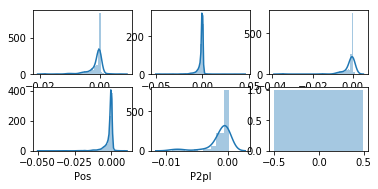

In [35]:
for idx, morpho_tag in enumerate(list(morpho_tag_to_id.keys())):
    if idx % 9 == 0:
        fig = plt.figure(int(idx/9))
    rem = idx % 9
    plt.subplot(3, 3, rem+1)
    print(morpho_tag)
#     sns.violinplot(data=list(loc_group_explanations[morpho_tag].clip(lower=-0.5, upper=0.5)))
    data = loc_group_explanations[morpho_tag].dropna().clip(lower=-0.5, upper=0.5)
    print(data)
    if data.size > 0:
        sns.distplot(data)
plt.show()

In [36]:
loc_group_explanations

,PresPart^DB,Acc,Real,Pos,P2pl,Stay^DB,Dim,Imp,PCGen,Pos^DB,...,Stay,NotState,Real^DB,Loc^DB,Pers,Ratio,Ins,Recip,Prop,PersP
1,NaN,-0.000343,NaN,-0.000343,NaN,NaN,NaN,-0.000343,NaN,-0.000343,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.000343,NaN,0.011976,NaN
2,NaN,0.000100,NaN,0.000100,NaN,NaN,NaN,0.000100,NaN,0.000100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000027,NaN
3,NaN,-0.018088,NaN,-0.018088,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.211969,NaN
5,NaN,-0.000048,NaN,-0.000048,NaN,NaN,NaN,NaN,NaN,-0.000048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001386,NaN
6,NaN,-0.000050,NaN,-0.000050,NaN,NaN,NaN,NaN,NaN,-0.000050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001713,NaN
7,NaN,-0.001368,NaN,-0.001368,NaN,NaN,NaN,NaN,NaN,-0.001368,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042216,NaN
8,NaN,-0.000158,NaN,-0.000158,NaN,NaN,NaN,NaN,NaN,-0.000158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004216,NaN
9,NaN,-0.000837,NaN,-0.000837,NaN,NaN,NaN,NaN,NaN,-0.000837,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025421,NaN
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001784,NaN
15,NaN,-0.008288,NaN,-0.008288,NaN,NaN,NaN,NaN,NaN,-0.008288,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.116027,NaN


In [37]:
mean_loc_group_explanations = loc_group_explanations.mean()

In [38]:
mean_loc_group_explanations.sort_values(ascending=False)

Prop                            0.041413
Pnon                            0.001387
Loc                             0.000436
Dist^DB                         0.000002
Ratio                          -0.000058
Dup^DB                         -0.000077
Rel                            -0.000182
Hastily                        -0.000185
Rel^DB                         -0.000186
QuesP                          -0.000297
NotState                       -0.000412
Abl^DB                         -0.000418
Range                          -0.000511
Nom                            -0.000562
PCAcc                          -0.000638
Dat                            -0.000702
WithoutHavingDoneSo            -0.000723
DemonsP                        -0.000738
Dat^DB                         -0.000744
SinceDoingSo                   -0.000765
A3sg                           -0.000809
InBetween                      -0.000809
When^DB                        -0.000831
FitFor^DB                      -0.000858
Distrib         

In [39]:
loc_group_explanations['Loc'].sort_values()[:10]

5354    -0.053045
19424   -0.048364
16613   -0.046426
10436   -0.041370
6503    -0.037810
13573   -0.035518
18812   -0.033537
8799    -0.031651
2068    -0.021226
18643   -0.020892
Name: Loc, dtype: float64

In [40]:
loc_group_explanations['Loc'].sort_values(ascending=False)[:10]

12190    0.226137
12468    0.209549
14743    0.180590
16771    0.180451
17499    0.180451
10319    0.173254
1665     0.133967
7508     0.130966
17138    0.104637
20407    0.102134
Name: Loc, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12cf90da0>]],
      dtype=object)

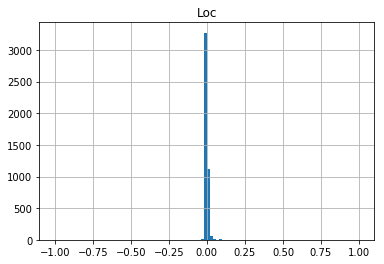

In [43]:
loc_group_explanations.hist(['Loc'], range=[-1, 1], bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12cf99a20>]],
      dtype=object)

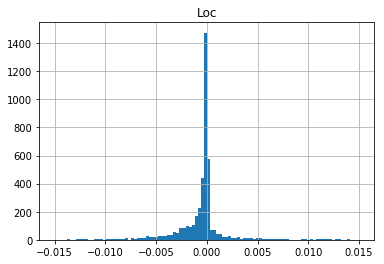

In [48]:
loc_group_explanations.hist(['Loc'], range=[-0.015, 0.015], bins=100)

In [69]:
loc_group_explanations['Loc'].value_counts().sort_values(ascending=False)

 3.864043e-03    4
 3.241734e-03    4
-6.119342e-05    2
 4.310615e-05    2
 1.375757e-03    2
-2.785775e-05    2
-2.118100e-04    2
-8.958014e-05    2
-2.183714e-04    2
-1.748451e-02    2
-1.612431e-03    2
 3.942213e-06    2
-2.728251e-04    2
-1.005967e-03    2
-2.521092e-04    2
 2.118214e-03    2
-2.226804e-04    2
 2.173822e-03    2
-4.444699e-05    2
 3.033458e-02    2
 1.654812e-03    2
-2.588910e-04    2
-5.718875e-04    2
-6.772747e-03    2
 2.133256e-06    2
-1.027175e-04    2
-1.022416e-05    2
-3.105809e-03    2
-1.257856e-03    2
-2.895252e-05    2
                ..
 6.254161e-04    1
-5.556325e-04    1
-5.914780e-04    1
-5.344973e-05    1
-1.257218e-03    1
-2.117192e-04    1
-7.002296e-03    1
-1.156744e-03    1
-8.145127e-05    1
 8.828563e-07    1
 4.090527e-03    1
-3.560898e-04    1
-1.426425e-04    1
-9.808047e-05    1
-2.792476e-04    1
-1.973418e-04    1
 5.126086e-04    1
-3.209276e-04    1
 1.009438e-04    1
 6.148742e-04    1
-4.598454e-05    1
 9.757987e-0

In [75]:
[(loc_group_explanations['Loc'][loc_group_explanations['Loc'] < 0]).mean(),
  (loc_group_explanations['Loc'][loc_group_explanations['Loc'] >= 0]).mean()]

[-0.001482690620947343, 0.005616132062326875]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124e40f28>]],
      dtype=object)

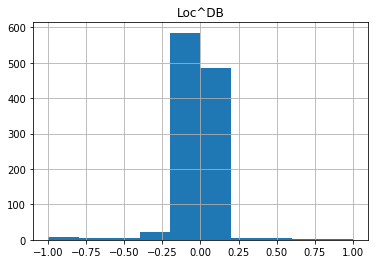

In [41]:
loc_group_explanations.hist(['Loc^DB'], range=[-1, 1])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12ce8a0b8>]],
      dtype=object)

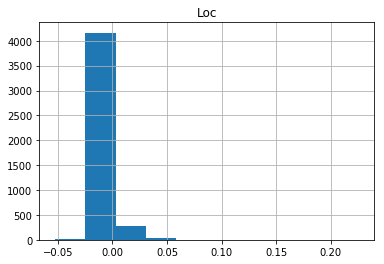

In [42]:
loc_group_explanations.hist(['Loc'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12502c320>]],
      dtype=object)

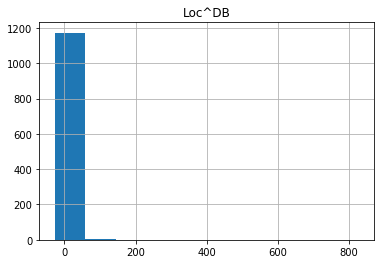

In [43]:
loc_group_explanations.hist(['Loc^DB'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12506ea20>]],
      dtype=object)

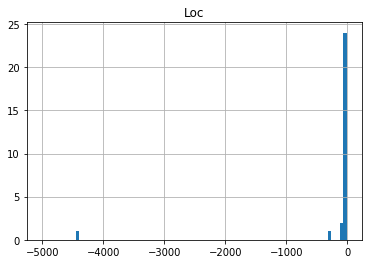

In [44]:
loc_group_explanations.hist(['Loc'], range=[-5000, -10], bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125021c88>]],
      dtype=object)

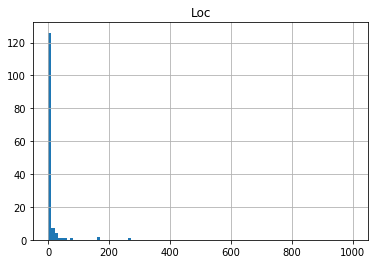

In [45]:
loc_group_explanations.hist(['Loc'], range=[1, 1000], bins=100)

In [46]:
loc_group_explanations['Loc'][loc_group_explanations['Loc'] < 0].count()

2681

In [47]:
loc_group_explanations['Loc'][loc_group_explanations['Loc'] >= 0].count()

1818

In [57]:
for morpho_tag in ['Loc', 'Loc^DB']:
    below_zero = loc_group_explanations[morpho_tag][loc_group_explanations[morpho_tag] < 0].count()
    above_zero = loc_group_explanations[morpho_tag][loc_group_explanations[morpho_tag] >= 0].count()
    print(morpho_tag, below_zero, above_zero)

Loc 2681 1818
Loc^DB 653 523


# ORG type entities - analysis

In [83]:
org_group_explanations = explanations[explanations['entity_type'] == "ORG"].drop(["sentence_idx", "entity_type", "entity_start", "entity_end"], axis=1)

In [84]:
org_group_explanations.mean().sort_values(ascending=False)

Prop            0.003953
Ratio           0.002247
InBetween       0.001907
Desr            0.000883
Adamantly       0.000699
FitFor^DB       0.000692
Prog2^DB        0.000579
PCGen           0.000368
PCIns^DB        0.000327
PCDat^DB        0.000317
Rel^DB          0.000309
Narr            0.000306
JustLike^DB     0.000289
PCNom^DB        0.000273
Narr^DB         0.000246
A3sg            0.000210
With            0.000175
Card^DB         0.000169
Recip^DB        0.000153
Range^DB        0.000148
FeelLike        0.000139
Inf             0.000122
AsIf^DB         0.000116
Distrib         0.000099
Without^DB      0.000098
Card            0.000098
Caus^DB         0.000084
Zero            0.000083
Dat^DB          0.000082
FitFor          0.000077
                  ...   
Prog2          -0.000203
Gen            -0.000212
NotState       -0.000225
Since          -0.000247
Dat            -0.000250
P2pl           -0.000284
Pass^DB        -0.000285
AsLongAs       -0.000311
Without        -0.000316


# PER type entities - analysis

In [85]:
per_group_explanations = explanations[explanations['entity_type'] == "PER"].drop(["sentence_idx", "entity_type", "entity_start", "entity_end"], axis=1)

In [86]:
per_group_explanations.mean().sort_values(ascending=False)

Prop                            8.088789e-03
Noun                            1.186685e-03
Abl^DB                          9.219708e-04
Real                            7.560110e-04
A3pl^DB                         7.102815e-04
Adv                             4.868597e-04
A3sg                            4.580544e-04
Gen^DB                          3.985312e-04
Dist^DB                         3.979438e-04
Real^DB                         3.583183e-04
Range                           2.992126e-04
Time                            1.891019e-04
Distrib                         1.828615e-04
Inf                             1.746864e-04
FeelLike                        1.370375e-04
When                            1.028079e-04
Rel^DB                          7.118581e-05
NotState                        6.202202e-05
*UNKNOWN*                       4.030132e-05
PCGen                           3.284247e-05
Dist                            1.443846e-05
Interj                          1.394440e-05
PCAbl^DB  

In [ ]:
!ls ../../explanations-for-ner-train-finnish-201901*